# Explore here

In [1]:
# Your code here
import pandas as pd

import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.stattools import adfuller

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import os
import joblib

from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')



In [2]:
print("----(1). CARGO EL DATASET----\n")

url = 'https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv'
df = pd.read_csv(url)

print(df.head())


----(1). CARGO EL DATASET----

                         date      sales
0  2022-09-03 17:10:08.079328  55.292157
1  2022-09-04 17:10:08.079328  53.803211
2  2022-09-05 17:10:08.079328  58.141693
3  2022-09-06 17:10:08.079328  64.530899
4  2022-09-07 17:10:08.079328  66.013633


In [3]:
tipo_dato_sales = df['date'].dtype
print(tipo_dato_sales)

object


----(2). CONVIERTO LA COKUMNA 'DATE' A TIPO DATETIME----



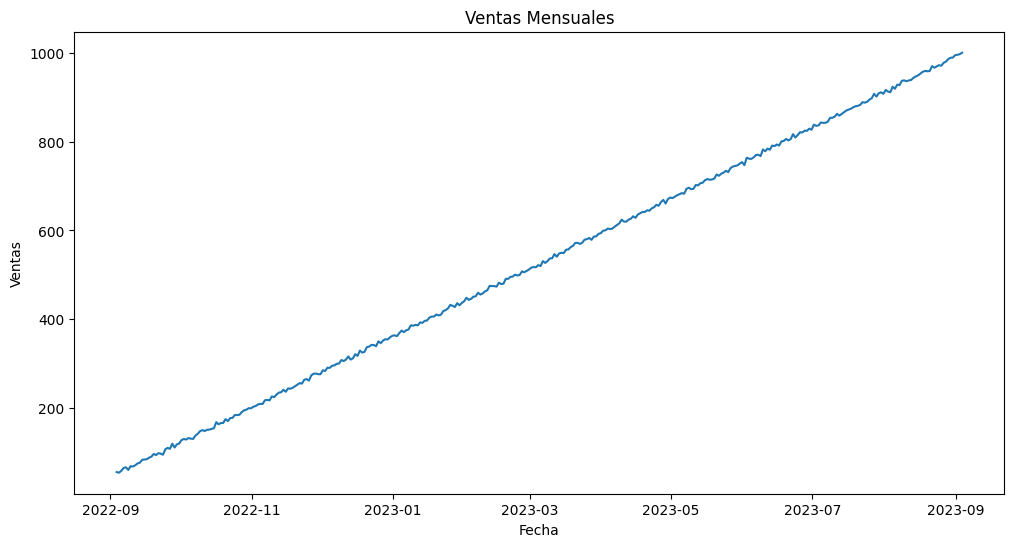

In [4]:
print("----(2). CONVIERTO LA COKUMNA 'DATE' A TIPO DATETIME----\n")

# Convierto la columna 'date' a tipo datetime
df['date'] = pd.to_datetime(df['date'])

# Establezco la columna 'date' como índice
df.set_index('date', inplace=True)

# Grafico la serie temporal
plt.figure(figsize=(12, 6))
plt.plot(df['sales'])
plt.title('Ventas Mensuales')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.show()


----(3). GRAFICO LAS VENTAS Y LA TENDENCIA EN UN MISMO GRAFICO----



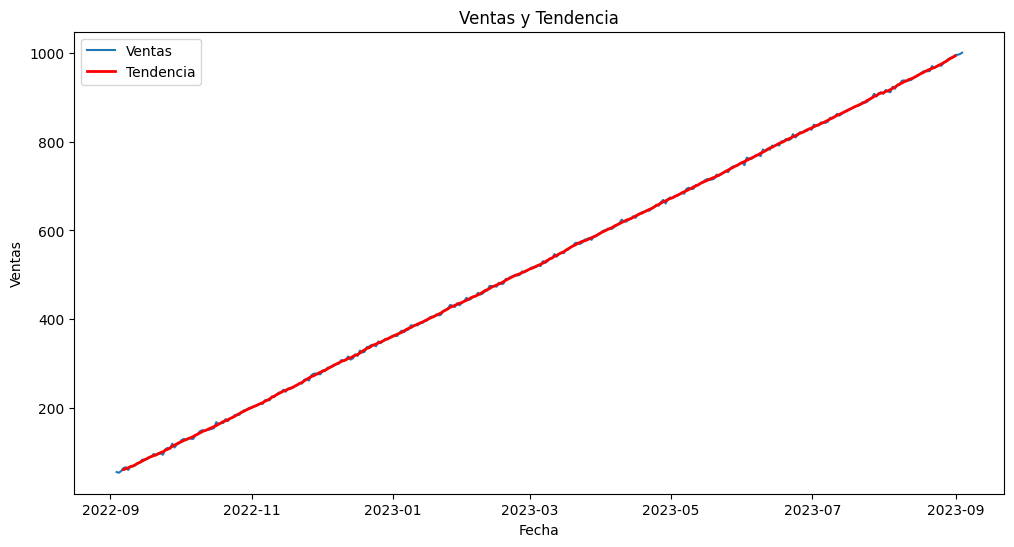

In [5]:
print("----(3). GRAFICO LAS VENTAS Y LA TENDENCIA EN UN MISMO GRAFICO----\n")
# Descompongo la serie temporal
result = seasonal_decompose(df['sales'], model='additive')

# Grafico las ventas y la tendencia en un mismo gráfico
plt.figure(figsize=(12, 6))
plt.plot(df['sales'], label='Ventas')
plt.plot(result.trend, label='Tendencia', color='red', linewidth=2)
plt.title('Ventas y Tendencia')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()


----(4). GRAFICO LAS VENTAS Y LA ESTACIONALIDAD EN UN MISMO GRAFICO----



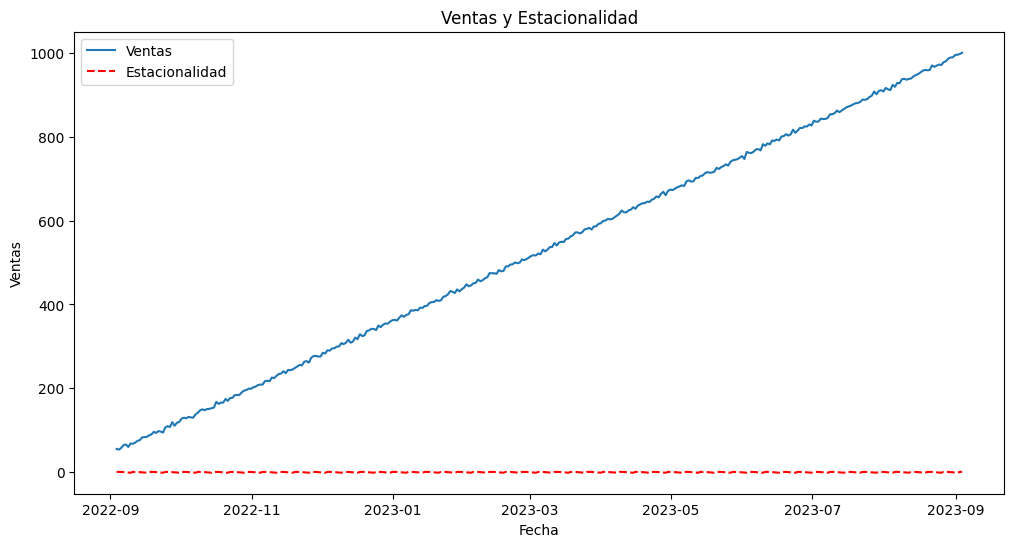

In [6]:
print("----(4). GRAFICO LAS VENTAS Y LA ESTACIONALIDAD EN UN MISMO GRAFICO----\n")
# Descompongo la serie temporal
result = seasonal_decompose(df['sales'], model='additive')

# Grafico las ventas y la estacionalidad en un mismo gráfico
plt.figure(figsize=(12, 6))
plt.plot(df['sales'], label='Ventas')
plt.plot(result.seasonal, label='Estacionalidad', color='red', linestyle='--')
plt.title('Ventas y Estacionalidad')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()


In [7]:
print("----(5). APLICO LA PRUEBA DE DICKEY-FULLER PARA MIRAR LA ESTACIONALIDAD----\n")

# Realizo la prueba de Dickey-Fuller
result = adfuller(df['sales'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')


----(5). APLICO LA PRUEBA DE DICKEY-FULLER PARA MIRAR LA ESTACIONALIDAD----

ADF Statistic: 0.545414193706378
p-value: 0.9861899815311064
Critical Values:
   1%, -3.4490648539347544
Critical Values:
   5%, -2.8697861692116478
Critical Values:
   10%, -2.5711631253228306


----(6). GRAFICO EL CORRELOGRAMA----



<Figure size 1200x600 with 0 Axes>

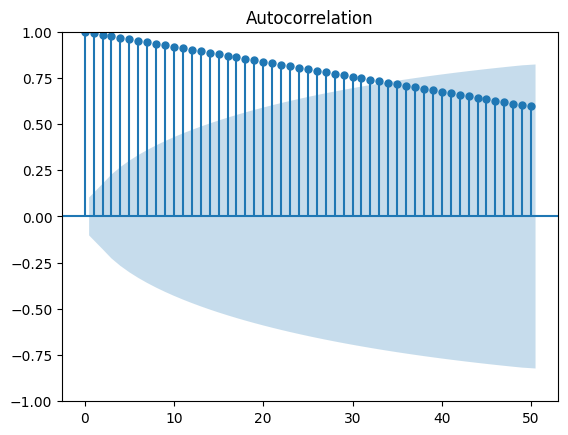

<Figure size 1200x600 with 0 Axes>

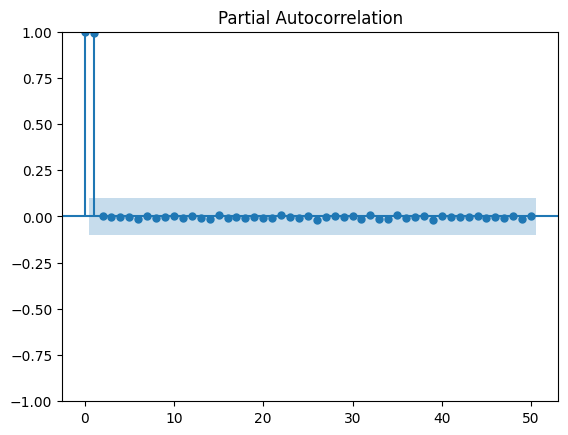

In [8]:
print("----(6). GRAFICO EL CORRELOGRAMA----\n")

# Grafico el correlograma
plt.figure(figsize=(12, 6))
plot_acf(df['sales'], lags=50)
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df['sales'], lags=50)
plt.show()


In [9]:
print("PREGUNTA 1: ¿Cuál es el tensor de la serie temporal?\nVENTAS\n")
print("PREGUNTA 2: ¿Cuál es la tendencia?\nCRECIENTE A LO LARGO DEL TIEMPO\n")
print("PREGUNTA 1: ¿Es estacionaria?\nNO\n")
print("PREGUNTA 1: ¿Existe variabilidad o presencia de ruido?\nNO\n")

PREGUNTA 1: ¿Cuál es el tensor de la serie temporal?
VENTAS

PREGUNTA 2: ¿Cuál es la tendencia?
CRECIENTE A LO LARGO DEL TIEMPO

PREGUNTA 1: ¿Es estacionaria?
NO

PREGUNTA 1: ¿Existe variabilidad o presencia de ruido?
NO



In [10]:
print("----(7). DIVIDO LOS DATOS EN TRAIN Y TEST Y ENTRENO EL MODELO ARIMA----")

# Divido los datos en entrenamiento y prueba
train = df['sales'][:int(0.8*len(df))]
test = df['sales'][int(0.8*len(df)):]

# Entreno el modelo ARIMA
model1 = ARIMA(train, order=(5, 1, 0))  # Ajustar el orden según el análisis previo
model1_entrenado = model1.fit()

# Imprimo resumen del modelo
print(model1_entrenado.summary())


----(7). DIVIDO LOS DATOS EN TRAIN Y TEST Y ENTRENO EL MODELO ARIMA----
                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  292
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -814.656
Date:                Tue, 10 Dec 2024   AIC                           1641.312
Time:                        15:06:19   BIC                           1663.351
Sample:                    09-03-2022   HQIC                          1650.141
                         - 06-21-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4148      0.059     -7.020      0.000      -0.531      -0.299
ar.L2          0.0833      0.059      1.405      0.160     

----(8). ENTRENO EL MODELO Y GRAFICO TRAIN, TEST Y PRONOSTICO----


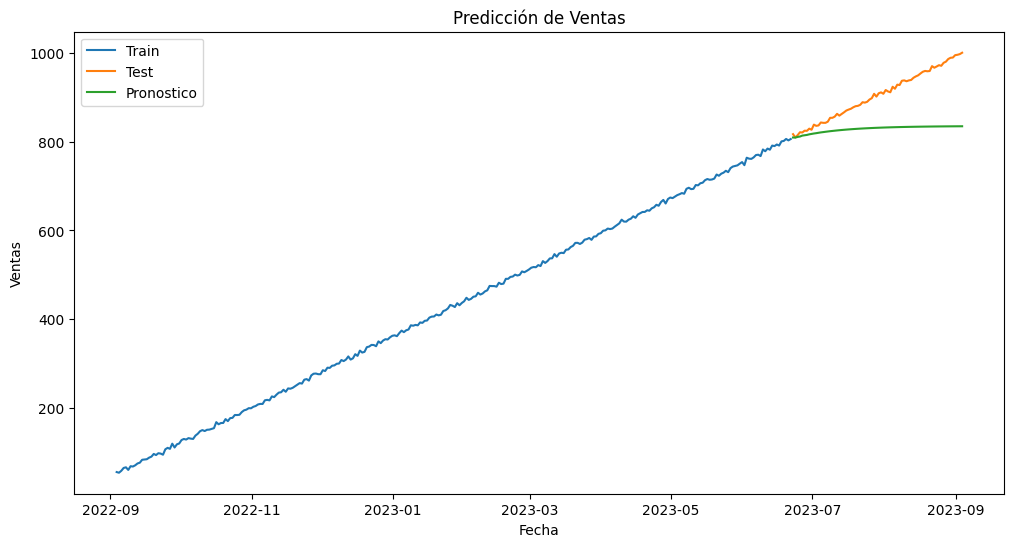

MSE: 8246.398492750544


In [11]:
print("----(8). ENTRENO EL MODELO Y GRAFICO TRAIN, TEST Y PRONOSTICO----")
# Predigo
forecast = model1_entrenado.forecast(steps=len(test))

# Grafico las predicciones
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Pronostico')
plt.title('Predicción de Ventas')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()

# Mido el rendimiento de la serie temporal
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test, forecast)
print(f'MSE: {mse}')


In [12]:
print("----(9). GUARDO EL MODELO EN SU RESPECTIVA CARPETA----")

# Defino la ruta donde se guardará el modelo
ruta_modelo = '/workspaces/Proyecto-serie-de-tiempos-Jorge3127/models/modelo_arima.pkl'


# Verifico si el directorio existe, si no, lo creo
directorio = os.path.dirname(ruta_modelo)
if not os.path.exists(directorio):
    os.makedirs(directorio)

# Guardo el modelo ARIMA
joblib.dump(model1_entrenado, ruta_modelo)

print(f"Modelo guardado en: {ruta_modelo}")


----(9). GUARDO EL MODELO EN SU RESPECTIVA CARPETA----
Modelo guardado en: /workspaces/Proyecto-serie-de-tiempos-Jorge3127/models/modelo_arima.pkl
